Importing the Libraries

In [ ]:
!pip install scikit-plot

In [ ]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Upload file into google colab session
from google.colab import files
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import plotly.express as px
from scipy import stats
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Sklearn for MLPClassifier
from sklearn.neural_network import MLPClassifier
#Fitting Decision Tree classifier to the training set  and testing set
from sklearn.tree import DecisionTreeClassifier 
#Using the algorithm i.e Gaussian (It is specially used when the features have continuous values.)
from sklearn.naive_bayes import GaussianNB
#Fitting Random Forest to the training set and testing set
from sklearn.ensemble import RandomForestClassifier 
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import scikitplot as skplt
from sklearn.metrics import plot_confusion_matrix
warnings.filterwarnings('ignore') 

Reading the File

In [ ]:
#Uploading the file
file = files.upload() 
#Reading the csv File
Data = pd.read_csv("TransactionalData.csv") 
#Printing the top 5 rows from dataframe
Data.head()

Saving TransactionalData.csv to TransactionalData.csv


,state,MaskUsage,SocialDistancing,mobilityLevels,PopulationDensity,casesPC_Levels,CurrentIncidencePhase,month,week,FutureIncidencePhase
0,California,N,Phase 0,VL,1,L,Phase 1,6,22,Phase 2
1,California,N,Phase 0,VL,1,L,Phase 1,6,23,Phase 2
2,California,N,Phase 0,VL,1,L,Phase 2,6,24,Phase 2
3,California,M,Phase 0,VL,1,L,Phase 2,6,25,Phase 2
4,California,M,Phase 0,VL,1,M,Phase 2,6,26,Phase 2


Data Pre-Processing

In [ ]:
#Getting how many rows and columns
Data.shape

(1050, 10)

In [ ]:
#Getting the information of each feature
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   state                  1050 non-null   object
 1   MaskUsage              1050 non-null   object
 2   SocialDistancing       1050 non-null   object
 3   mobilityLevels         1050 non-null   object
 4   PopulationDensity      1050 non-null   int64 
 5   casesPC_Levels         1050 non-null   object
 6   CurrentIncidencePhase  1050 non-null   object
 7   month                  1050 non-null   int64 
 8   week                   1050 non-null   int64 
 9   FutureIncidencePhase   1050 non-null   object
dtypes: int64(3), object(7)
memory usage: 82.2+ KB


In [ ]:
#Checking the null values
Data.isnull().sum()

state                    0
MaskUsage                0
SocialDistancing         0
mobilityLevels           0
PopulationDensity        0
casesPC_Levels           0
CurrentIncidencePhase    0
month                    0
week                     0
FutureIncidencePhase     0
dtype: int64

In [ ]:
#Getting the Statistical Information
Data.describe()

,PopulationDensity,month,week
count,1050.000000,1050.000000,1050.000000
mean,1.220000,7.809524,32.000000
std,0.540257,1.367575,6.058186
min,1.000000,6.000000,22.000000
25%,1.000000,7.000000,27.000000
50%,1.000000,8.000000,32.000000
75%,1.000000,9.000000,37.000000
max,3.000000,10.000000,42.000000


Data Exploring

1. Count of Future Incidence Phase

In [ ]:
#Get count of number of Future Incidence Phase
Data['FutureIncidencePhase'].value_counts()

Phase 2    425
Phase 1    321
Phase 3    216
Phase 4     81
Phase 5      7
Name: FutureIncidencePhase, dtype: int64

In [ ]:
#Grouping the type of FutureIncidencePhase and taking the count
df = pd.DataFrame(Data.groupby(by = ['FutureIncidencePhase']).size().reset_index(name = 'count'))
#Getting count of type of FutureIncidencePhase
fig = px.pie(df, values="count" , names ="FutureIncidencePhase",color_discrete_sequence = px.colors.sequential.RdBu, template = "plotly_dark",width=800, height=400)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title = 'Count of Phase')
fig.show()

######Phase 1:  The number of cases continues to grow at a constant rate.
######Phase 2:  The number of cases increase rapidly, leading to an explosion in the number of new cases
######Phase 3: Decrease in the number of cases.
######Phase 4: Decrease in the number of cases and county-level or a state-level mask mandate.
######Phase 5: No Cases.

2. In Which phase the social distancing is followed in different state and in month

In [ ]:
fig = px.bar(Data, x = "state", y = "month", color = "SocialDistancing",barmode = 'stack',title = 'Statewise and Monthwise Social Distancing',
             color_discrete_sequence = px.colors.sequential.RdBu_r, template = "plotly_dark")
fig.show()

Here we can observe statewise, monthwise in which phase social distancing 

#####Phase 0: Only essential businesses are open, and all the other businesses are closed. All restaurants and bars are closed. All schools are closed. Large gatherings are banned.
######Phase 1: All restaurants and bars are opened at 25% capacity. Personal service industries like massage parlors, tattoos are open. Schools and other gatherings are closed.
######Phase 2: All restaurants and bars are opened at 50%. Schools and large gatherings are closed.
######Phase 3: All restaurants and bars are opened at 50%. Schools and other large gatherings are open.
#####Phase 4: All restaurants and bars are open at 75% capacity.
#####Phase 5: No restrictions are placed on the businesses or individuals.

3. In Which phase the Mask Usage is followed in different state and in month

In [ ]:
fig = px.bar(Data, x = "state", y = "month", color = Data["MaskUsage"].map({
                     "N": "No Mask",
                     "M": "Mandate Mask",
                     "C": "Country Level Mask Mandate",
                     "R": 'Recommended Mask'}),barmode = 'stack',title = 'Statewise and Monthwise Mask Usage',
             color_discrete_sequence = px.colors.sequential.PuBuGn_r, template = "plotly_dark")
fig.show()

4. Count of Mobility Levels

In [ ]:
#Grouping the type of FutureIncidencePhase and taking the count
df = pd.DataFrame(Data.groupby(by = ['mobilityLevels']).size().reset_index(name = 'count'))
#Getting count of type of FutureIncidencePhase
fig = px.pie(df, values="count" , names ="mobilityLevels",color_discrete_sequence = px.colors.sequential.Magenta, template = "plotly_dark",width=800, height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title = 'Count of Mobility Levels')
fig.show()

5. In Which Statewise and Monthwise Mobility Level

In [ ]:
fig = px.bar(Data, x = "state", y = "month", color = "mobilityLevels",barmode = 'stack',title = 'Statewise and Monthwise Mobility Level',
             color_discrete_sequence = px.colors.sequential.Bluyl, template = "plotly_dark")
fig.show()

6. Statewise and Weekwise Case Per Captia Level

In [ ]:
fig = px.bar(Data, x="state", y="casesPC_Levels", color="week",barmode = 'overlay',template = "plotly_dark")
fig.show()

Converting the Categorical Columns using the Label Enconding

In [ ]:
#Encode the  values
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
Data['FutureIncidencePhase'] = labelencoder.fit_transform(Data['FutureIncidencePhase'])

In [ ]:
#Seeing the Columns
Data.columns

Index(['state', 'MaskUsage', 'SocialDistancing', 'mobilityLevels',
       'PopulationDensity', 'casesPC_Levels', 'CurrentIncidencePhase', 'month',
       'week', 'FutureIncidencePhase'],
      dtype='object')

In [ ]:
Data['state'] = labelencoder.fit_transform(Data['FutureIncidencePhase'])
Data['MaskUsage'] = labelencoder.fit_transform(Data['MaskUsage'])
Data['SocialDistancing'] = labelencoder.fit_transform(Data['SocialDistancing'])
Data['mobilityLevels'] = labelencoder.fit_transform(Data['mobilityLevels'])
Data['casesPC_Levels'] = labelencoder.fit_transform(Data['casesPC_Levels'])

In [ ]:
Data['CurrentIncidencePhase'] = labelencoder.fit_transform(Data['CurrentIncidencePhase'])

In [ ]:
Data.head()

,state,MaskUsage,SocialDistancing,mobilityLevels,PopulationDensity,casesPC_Levels,CurrentIncidencePhase,month,week,FutureIncidencePhase
0,1,2,0,4,1,1,0,6,22,1
1,1,2,0,4,1,1,0,6,23,1
2,1,2,0,4,1,1,1,6,24,1
3,1,1,0,4,1,1,1,6,25,1
4,1,1,0,4,1,2,1,6,26,1


Relationship between the Features

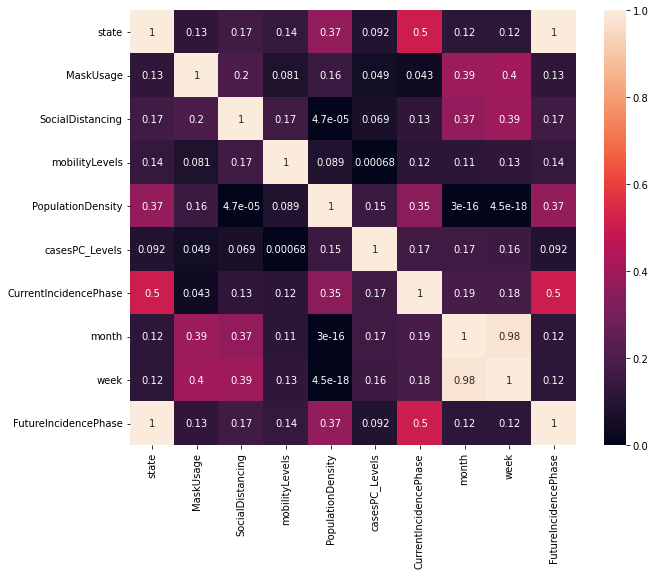

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(Data.corr().abs(), annot= True)
plt.show()

Seeing the Outlier

In [ ]:
df = Data.copy()

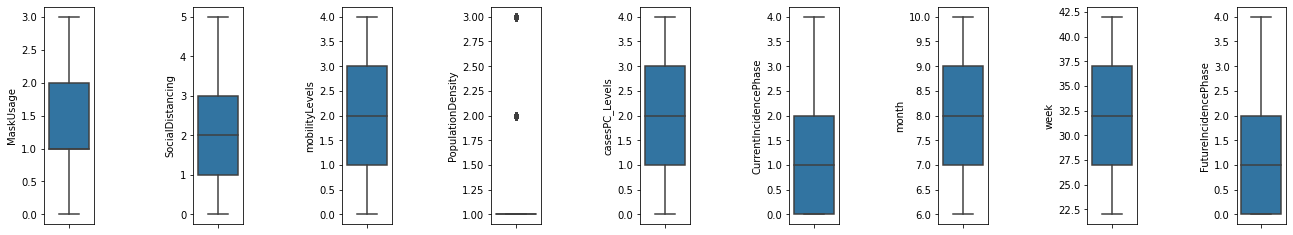

In [ ]:
data_to_plot = df.iloc[:, 1:]
fig, ax = plt.subplots(ncols=len(data_to_plot.columns))
plt.subplots_adjust(right=3, wspace=2)
for i, col in enumerate(data_to_plot.columns):
  sns.boxplot(y=data_to_plot[col], ax = ax[i])

In [ ]:
#from scipy import stats
#z = np.abs(stats.zscore(Data))
#Data = Data[(z < 3).all(axis=1)]

Creating the Variable X and Y

In [ ]:
#Creating the variable x and y
x = Data.drop('FutureIncidencePhase', axis=1)
y = Data['FutureIncidencePhase']

Splitting the Data into Train and Test

In [ ]:
#split the data into train and test set
X_train, X_test, y_train, y_test= train_test_split(x, y,test_size = 0.3,shuffle = True,random_state = 0)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(688, 9)
(688,)
(295, 9)
(295,)


Feature Scaling

In [ ]:
#Creating the variable for Standardscaler object
scaler = StandardScaler()
#Fit the model
scaler.fit(X_train)
#Making the transform for x train and x test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

Using Cross Validation (5 Fold)

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)

####KNN
####Decision Tree
####Navie Bayes
####Support Vector Machine
####MLP
####Random Forest

1. Support Vector Machine

In [ ]:
#Sklearn for SVC
from sklearn.svm import SVC

In [ ]:
#Initializing the MLPClassifier
classifier =  SVC(probability=True)

Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   1  20]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  0.9523809523809523


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  0.9957805907172996
Specificity for class 4:  1.0


Precision: 1.00
Recall: 0.99
F1 Score: 0.99




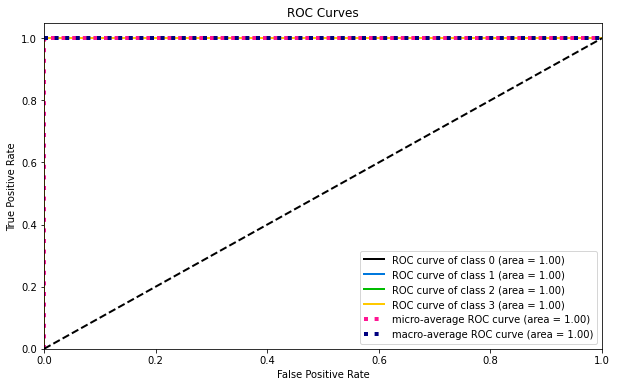



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   1  20]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  0.9523809523809523


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  0.9957805907172996
Specificity for class 4:  1.0


Precision: 1.00
Recall: 0.99
F1 Score: 0.99




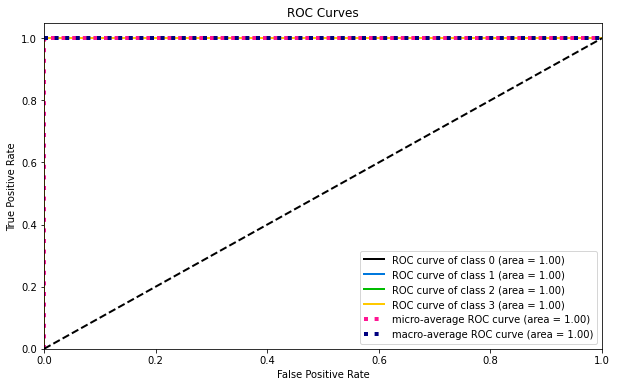



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   1  20]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  0.9523809523809523


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  0.9957805907172996
Specificity for class 4:  1.0


Precision: 1.00
Recall: 0.99
F1 Score: 0.99




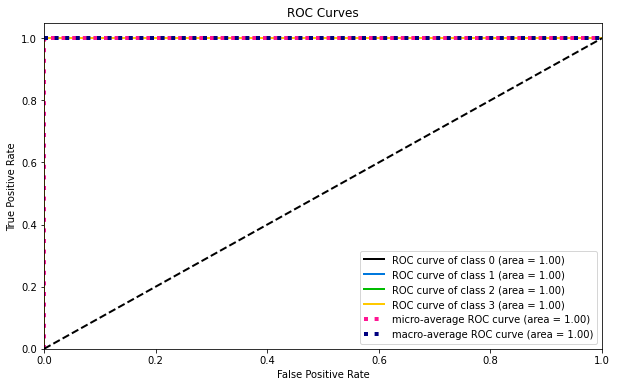



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   1  20]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  0.9523809523809523


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  0.9957805907172996
Specificity for class 4:  1.0


Precision: 1.00
Recall: 0.99
F1 Score: 0.99




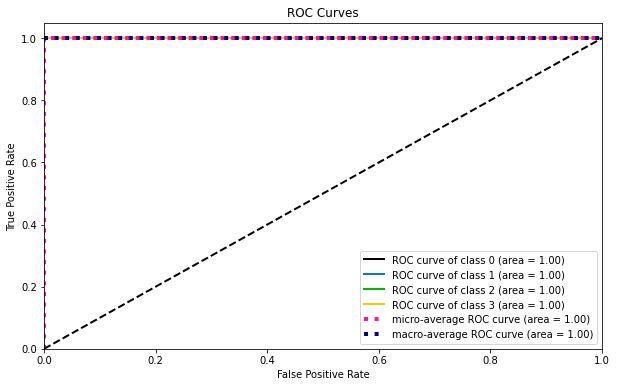



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   1  20]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  0.9523809523809523


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  0.9957805907172996
Specificity for class 4:  1.0


Precision: 1.00
Recall: 0.99
F1 Score: 0.99




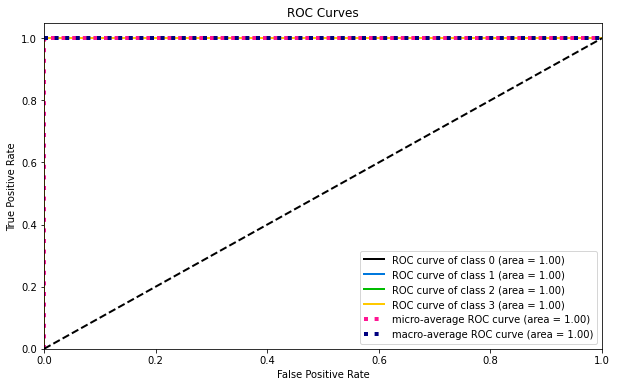

In [ ]:
SensitivityClass1 = []
SensitivityClass2 = []
SensitivityClass3 = []
SensitivityClass4 = []

SpecificityClass1 = []
SpecificityClass2 = []
SpecificityClass3 = []
SpecificityClass4 = []


for train_index, test_index in kfold.split(x,y):
  classifier.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = classifier.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = classifier.predict(X_train)
  y_prob = classifier.predict_proba(X_test)
  
  cm = confusion_matrix(y_test,y_pred)
  print("Confusion Matrix: ")
  print(cm)
  print("\n")
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3])
  print('Sensitivity for class 1: ', sensitivity )
  SensitivityClass1.append(sensitivity)

  sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3])
  print('Sensitivity for class 2: ', sensitivity )
  SensitivityClass2.append(sensitivity)

  sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3])
  print('Sensitivity for class 3: ', sensitivity )
  SensitivityClass3.append(sensitivity)

  sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3])
  print('Sensitivity for class 4: ', sensitivity )
  SensitivityClass4.append(sensitivity)
  #----------------------------------------------------------------------
  print("\n")
  specificity = (cm[1,1]+cm[2,2]+cm[3,3])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[1,1]+cm[2,2]+cm[3,3])
  print('Specificity for class 1: ', specificity)
  SpecificityClass1.append(specificity)

  specificity = (cm[0,0]+cm[2,2]+cm[3,3])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[0,0]+cm[2,2]+cm[3,3])
  print('Specificity for class 2: ', specificity)
  SpecificityClass2.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[3,3])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[0,0]+cm[1,1]+cm[3,3])
  print('Specificity for class 3: ', specificity)
  SpecificityClass3.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[0,0]+cm[1,1]+cm[2,2])
  print('Specificity for class 4: ', specificity)
  SpecificityClass4.append(specificity)
  #-----------------------------------------------------------------------------------
  print("\n")
  print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
  print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='macro')))
  print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred,average='macro')))
  print("\n")
  #----------------------------------------------------------------------
  skplt.metrics.plot_roc(y_test, y_prob,figsize=(10,6),title_fontsize=12,text_fontsize=10)
  plt.show()
  print("\n")

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
SVC_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("SVC model accuracy(in %) for Training:",SVC_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
SVC_Test = metrics.accuracy_score(y_test, y_pred)*100
print("SVC model accuracy(in %) for Testing:", SVC_Test)

SVC model accuracy(in %) for Training: 100.0
SVC model accuracy(in %) for Testing: 99.66101694915255


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for SVC:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for SVC:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For SVC:",result2)

Confusion Matrix for SVC:
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   1  20]]
Classification Report for SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       108
           2       0.98      1.00      0.99        58
           3       1.00      0.95      0.98        21

    accuracy                           1.00       295
   macro avg       1.00      0.99      0.99       295
weighted avg       1.00      1.00      1.00       295

Overall Accuracy For SVC: 0.9966101694915255


In [ ]:
#performance measure
SVC_ACC = accuracy_score(y_test,y_pred)
print("Overall Accuracy For SVC:",SVC_ACC)
SVC_ROC_AUC = roc_auc_score(y_test, y_prob, multi_class='ovo', average='weighted')
print("ROC_AUC Score:",SVC_ROC_AUC)
SVC_Precision = precision_score(y_test, y_pred,average='macro')
print('Precision:',SVC_Precision)
SVC_Recall = recall_score(y_test, y_pred,average='macro')
print('Recall:',SVC_Recall)
SVC_F1 = f1_score(y_test, y_pred,average='macro')
print('F1 Score:',SVC_F1)

Overall Accuracy For SVC: 0.9966101694915255
ROC_AUC Score: 1.0
Precision: 0.9957627118644068
Recall: 0.9880952380952381
F1 Score: 0.9917656868876381


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
SVC_TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
SVC_TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,SVC_TPR)
print('Specificity: ' ,SVC_TNR)

Sensitivity: 98.80952380952381
Specificity:  99.89451476793249


2. KNN

In [ ]:
#Calling the KNeighborsClassifier (in-build function) using skelarn libray
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Initializing the MLPClassifier
KNNclassifier =  KNeighborsClassifier(n_neighbors = 5)

Confusion Matrix: 
[[103   5   0   0]
 [  3 104   1   0]
 [  0   8  50   0]
 [  0   0   5  16]]


Sensitivity for class 1:  0.9537037037037037
Sensitivity for class 2:  0.9629629629629629
Sensitivity for class 3:  0.8620689655172413
Sensitivity for class 4:  0.7619047619047619


Specificity for class 1:  0.9826589595375722
Specificity for class 2:  0.9285714285714286
Specificity for class 3:  0.9737991266375546
Specificity for class 4:  1.0


Precision: 0.94
Recall: 0.89
F1 Score: 0.91




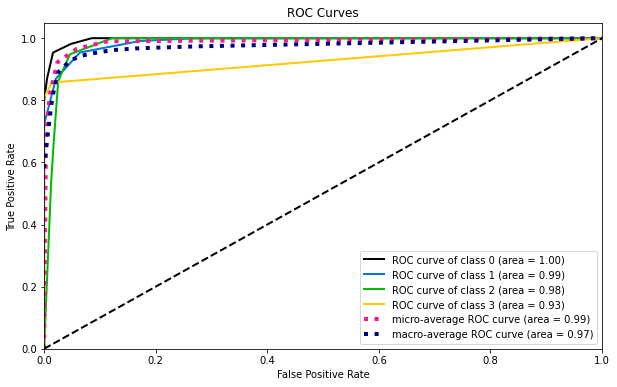



Confusion Matrix: 
[[103   5   0   0]
 [  3 104   1   0]
 [  0   8  50   0]
 [  0   0   5  16]]


Sensitivity for class 1:  0.9537037037037037
Sensitivity for class 2:  0.9629629629629629
Sensitivity for class 3:  0.8620689655172413
Sensitivity for class 4:  0.7619047619047619


Specificity for class 1:  0.9826589595375722
Specificity for class 2:  0.9285714285714286
Specificity for class 3:  0.9737991266375546
Specificity for class 4:  1.0


Precision: 0.94
Recall: 0.89
F1 Score: 0.91




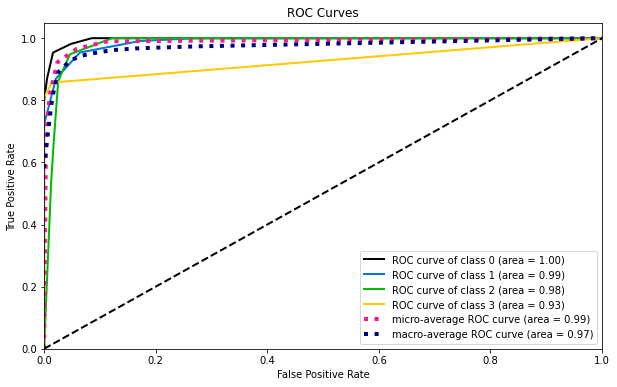



Confusion Matrix: 
[[103   5   0   0]
 [  3 104   1   0]
 [  0   8  50   0]
 [  0   0   5  16]]


Sensitivity for class 1:  0.9537037037037037
Sensitivity for class 2:  0.9629629629629629
Sensitivity for class 3:  0.8620689655172413
Sensitivity for class 4:  0.7619047619047619


Specificity for class 1:  0.9826589595375722
Specificity for class 2:  0.9285714285714286
Specificity for class 3:  0.9737991266375546
Specificity for class 4:  1.0


Precision: 0.94
Recall: 0.89
F1 Score: 0.91




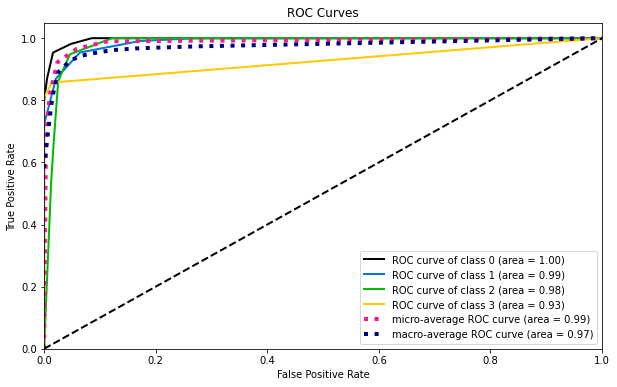



Confusion Matrix: 
[[103   5   0   0]
 [  3 104   1   0]
 [  0   8  50   0]
 [  0   0   5  16]]


Sensitivity for class 1:  0.9537037037037037
Sensitivity for class 2:  0.9629629629629629
Sensitivity for class 3:  0.8620689655172413
Sensitivity for class 4:  0.7619047619047619


Specificity for class 1:  0.9826589595375722
Specificity for class 2:  0.9285714285714286
Specificity for class 3:  0.9737991266375546
Specificity for class 4:  1.0


Precision: 0.94
Recall: 0.89
F1 Score: 0.91




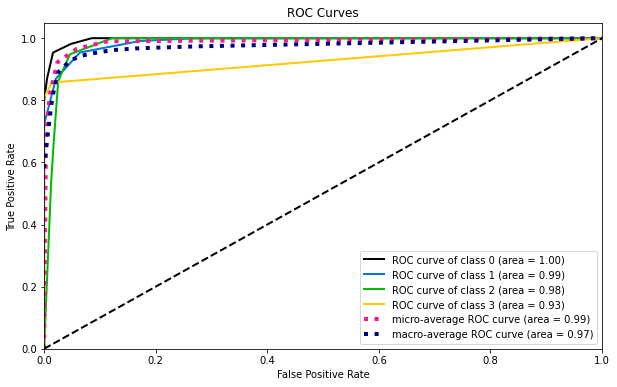



Confusion Matrix: 
[[103   5   0   0]
 [  3 104   1   0]
 [  0   8  50   0]
 [  0   0   5  16]]


Sensitivity for class 1:  0.9537037037037037
Sensitivity for class 2:  0.9629629629629629
Sensitivity for class 3:  0.8620689655172413
Sensitivity for class 4:  0.7619047619047619


Specificity for class 1:  0.9826589595375722
Specificity for class 2:  0.9285714285714286
Specificity for class 3:  0.9737991266375546
Specificity for class 4:  1.0


Precision: 0.94
Recall: 0.89
F1 Score: 0.91




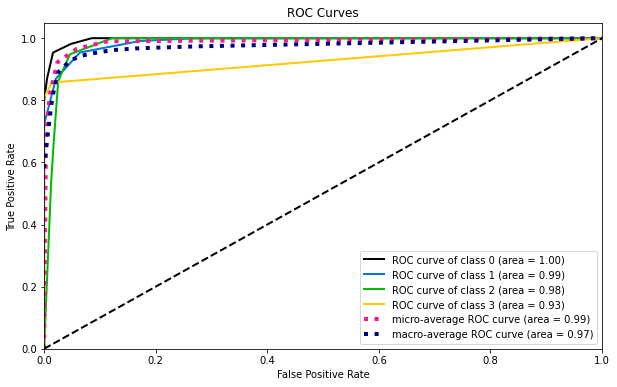

In [ ]:
SensitivityClass1 = []
SensitivityClass2 = []
SensitivityClass3 = []
SensitivityClass4 = []

SpecificityClass1 = []
SpecificityClass2 = []
SpecificityClass3 = []
SpecificityClass4 = []


for train_index, test_index in kfold.split(x,y):
  KNNclassifier.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = KNNclassifier.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = KNNclassifier.predict(X_train)
  y_prob = KNNclassifier.predict_proba(X_test)
  
  cm = confusion_matrix(y_test,y_pred)
  print("Confusion Matrix: ")
  print(cm)
  print("\n")
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3])
  print('Sensitivity for class 1: ', sensitivity )
  SensitivityClass1.append(sensitivity)

  sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3])
  print('Sensitivity for class 2: ', sensitivity )
  SensitivityClass2.append(sensitivity)

  sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3])
  print('Sensitivity for class 3: ', sensitivity )
  SensitivityClass3.append(sensitivity)

  sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3])
  print('Sensitivity for class 4: ', sensitivity )
  SensitivityClass4.append(sensitivity)
  #----------------------------------------------------------------------
  print("\n")
  specificity = (cm[1,1]+cm[2,2]+cm[3,3])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[1,1]+cm[2,2]+cm[3,3])
  print('Specificity for class 1: ', specificity)
  SpecificityClass1.append(specificity)

  specificity = (cm[0,0]+cm[2,2]+cm[3,3])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[0,0]+cm[2,2]+cm[3,3])
  print('Specificity for class 2: ', specificity)
  SpecificityClass2.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[3,3])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[0,0]+cm[1,1]+cm[3,3])
  print('Specificity for class 3: ', specificity)
  SpecificityClass3.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[0,0]+cm[1,1]+cm[2,2])
  print('Specificity for class 4: ', specificity)
  SpecificityClass4.append(specificity)
  #-----------------------------------------------------------------------------------
  print("\n")
  print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
  print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='macro')))
  print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred,average='macro')))
  print("\n")
  #----------------------------------------------------------------------
  skplt.metrics.plot_roc(y_test, y_prob,figsize=(10,6),title_fontsize=12,text_fontsize=10)
  plt.show()
  print("\n")

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
KNN_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("KNN model accuracy(in %) for Training:",KNN_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
KNN_Test = metrics.accuracy_score(y_test, y_pred)*100
print("KNN model accuracy(in %) for Testing:", KNN_Test)

KNN model accuracy(in %) for Training: 96.22093023255815
KNN model accuracy(in %) for Testing: 92.54237288135593


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for KNN:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for KNN:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For KNN:",result2)

Confusion Matrix for KNN:
[[103   5   0   0]
 [  3 104   1   0]
 [  0   8  50   0]
 [  0   0   5  16]]
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       108
           1       0.89      0.96      0.92       108
           2       0.89      0.86      0.88        58
           3       1.00      0.76      0.86        21

    accuracy                           0.93       295
   macro avg       0.94      0.89      0.91       295
weighted avg       0.93      0.93      0.92       295

Overall Accuracy For KNN: 0.9254237288135593


In [ ]:
#performance measure
KNN_ACC = accuracy_score(y_test,y_pred)
print("Overall Accuracy For KNN:",KNN_ACC)
KNN_ROC_AUC = roc_auc_score(y_test, y_prob, multi_class='ovo', average='weighted')
print("ROC_AUC Score:",KNN_ROC_AUC)
KNN_Precision = precision_score(y_test, y_pred,average='macro')
print('Precision:',KNN_Precision)
KNN_Recall = recall_score(y_test, y_pred,average='macro')
print('Recall:',KNN_Recall)
KNN_F1 = f1_score(y_test, y_pred,average='macro')
print('F1 Score:',KNN_F1)

Overall Accuracy For KNN: 0.9254237288135593
ROC_AUC Score: 0.9749295460331892
Precision: 0.9383610362383947
Recall: 0.8851600985221675
F1 Score: 0.907279778548839


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
KNN_TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
KNN_TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,KNN_TPR)
print('Specificity: ' ,KNN_TNR)

Sensitivity: 88.51600985221675
Specificity:  97.22805117443986


3. Navies Bayes

In [ ]:
#Initializing the MLPClassifier
NBclassifier =  GaussianNB(priors = None, var_smoothing = 1e-09)

Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0


Precision: 1.00
Recall: 1.00
F1 Score: 1.00




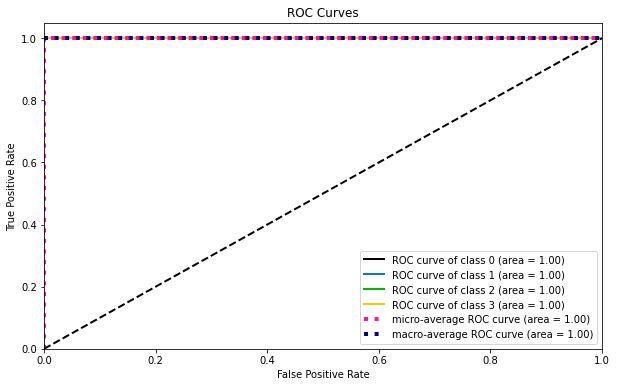



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0


Precision: 1.00
Recall: 1.00
F1 Score: 1.00




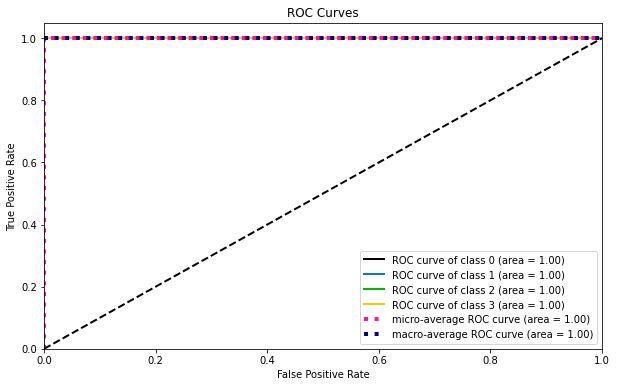



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0


Precision: 1.00
Recall: 1.00
F1 Score: 1.00




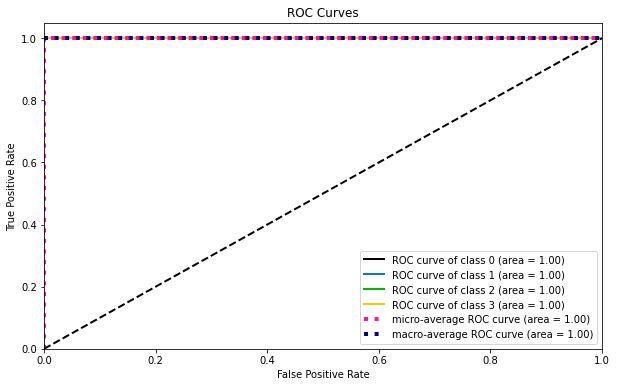



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0


Precision: 1.00
Recall: 1.00
F1 Score: 1.00




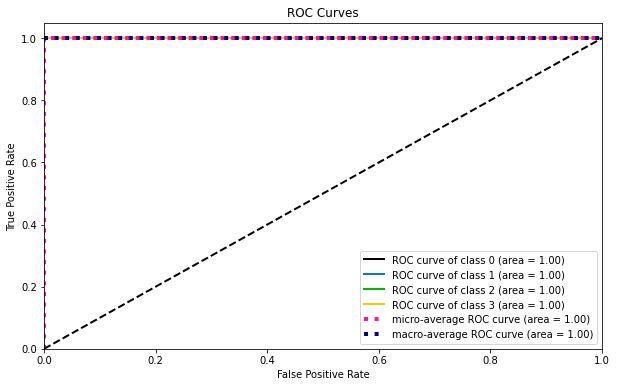



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0


Precision: 1.00
Recall: 1.00
F1 Score: 1.00




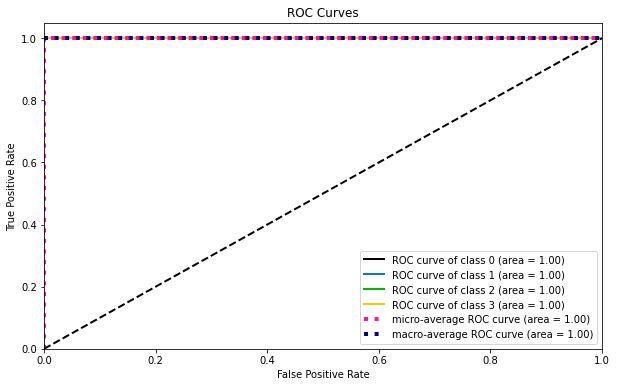

In [ ]:
SensitivityClass1 = []
SensitivityClass2 = []
SensitivityClass3 = []
SensitivityClass4 = []

SpecificityClass1 = []
SpecificityClass2 = []
SpecificityClass3 = []
SpecificityClass4 = []


for train_index, test_index in kfold.split(x,y):
  NBclassifier.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = NBclassifier.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = NBclassifier.predict(X_train)
  y_prob = NBclassifier.predict_proba(X_test)
  
  cm = confusion_matrix(y_test,y_pred)
  print("Confusion Matrix: ")
  print(cm)
  print("\n")
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3])
  print('Sensitivity for class 1: ', sensitivity )
  SensitivityClass1.append(sensitivity)

  sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3])
  print('Sensitivity for class 2: ', sensitivity )
  SensitivityClass2.append(sensitivity)

  sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3])
  print('Sensitivity for class 3: ', sensitivity )
  SensitivityClass3.append(sensitivity)

  sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3])
  print('Sensitivity for class 4: ', sensitivity )
  SensitivityClass4.append(sensitivity)
  #----------------------------------------------------------------------
  print("\n")
  specificity = (cm[1,1]+cm[2,2]+cm[3,3])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[1,1]+cm[2,2]+cm[3,3])
  print('Specificity for class 1: ', specificity)
  SpecificityClass1.append(specificity)

  specificity = (cm[0,0]+cm[2,2]+cm[3,3])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[0,0]+cm[2,2]+cm[3,3])
  print('Specificity for class 2: ', specificity)
  SpecificityClass2.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[3,3])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[0,0]+cm[1,1]+cm[3,3])
  print('Specificity for class 3: ', specificity)
  SpecificityClass3.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[0,0]+cm[1,1]+cm[2,2])
  print('Specificity for class 4: ', specificity)
  SpecificityClass4.append(specificity)
  #-----------------------------------------------------------------------------------
  print("\n")
  print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
  print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='macro')))
  print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred,average='macro')))
  print("\n")
  #----------------------------------------------------------------------
  skplt.metrics.plot_roc(y_test, y_prob,figsize=(10,6),title_fontsize=12,text_fontsize=10)
  plt.show()
  print("\n")

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
NB_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("NB model accuracy(in %) for Training:",NB_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
NB_Test = metrics.accuracy_score(y_test, y_pred)*100
print("NB model accuracy(in %) for Testing:", NB_Test)

NB model accuracy(in %) for Training: 100.0
NB model accuracy(in %) for Testing: 100.0


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for NB:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for NB:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For NB:",result2)

Confusion Matrix for NB:
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]
Classification Report for NB:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00        58
           3       1.00      1.00      1.00        21

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295

Overall Accuracy For NB: 1.0


In [ ]:
#performance measure
NB_ACC = accuracy_score(y_test,y_pred)
print("Overall Accuracy For NB:",NB_ACC)
NB_ROC_AUC = roc_auc_score(y_test, y_prob, multi_class='ovo', average='weighted')
print("ROC_AUC Score:",NB_ROC_AUC)
NB_Precision = precision_score(y_test, y_pred,average='macro')
print('Precision:',NB_Precision)
NB_Recall = recall_score(y_test, y_pred,average='macro')
print('Recall:',NB_Recall)
NB_F1 = f1_score(y_test, y_pred,average='macro')
print('F1 Score:',NB_F1)

Overall Accuracy For NB: 1.0
ROC_AUC Score: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
NB_TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
NB_TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,NB_TPR)
print('Specificity: ' ,NB_TNR)

Sensitivity: 100.0
Specificity:  100.0


4.MLP

In [ ]:
#Initializing the MLPClassifier
MLPclassifier = MLPClassifier(hidden_layer_sizes=(10,5),max_iter=200)

Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  53   5]
 [  0   0  10  11]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.9137931034482759
Sensitivity for class 4:  0.5238095238095238


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  0.9578059071729957
Specificity for class 4:  0.9817518248175182


Precision: 0.88
Recall: 0.86
F1 Score: 0.87




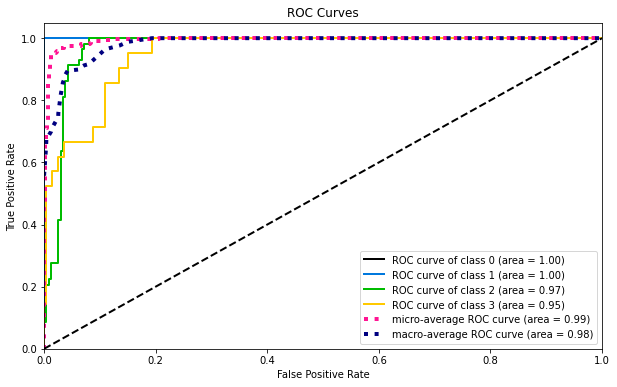



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   7  14]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  0.6666666666666666


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  0.9704641350210971
Specificity for class 4:  1.0


Precision: 0.97
Recall: 0.92
F1 Score: 0.94




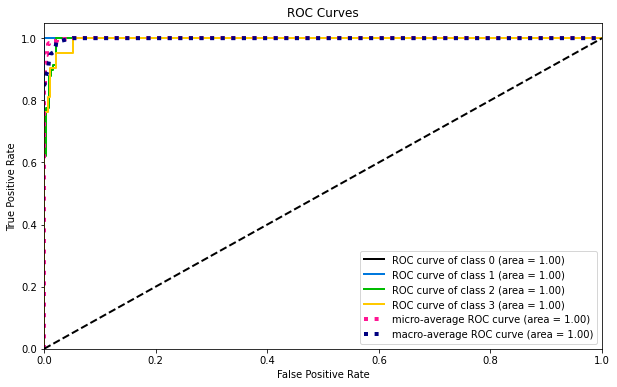



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   2  19]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  0.9047619047619048


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  0.9915611814345991
Specificity for class 4:  1.0


Precision: 0.99
Recall: 0.98
F1 Score: 0.98




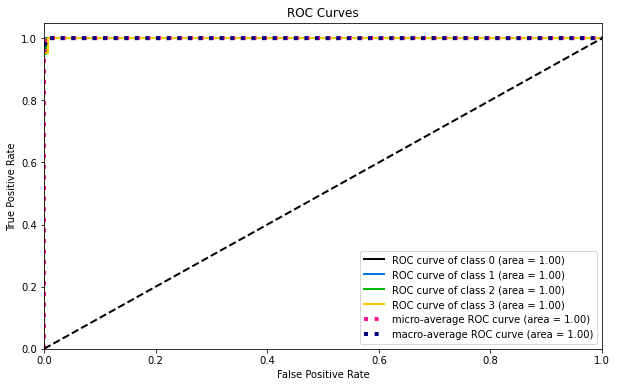



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   4  51   3]
 [  0   0  17   4]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.8793103448275862
Sensitivity for class 4:  0.19047619047619047


Specificity for class 1:  1.0
Specificity for class 2:  0.9760479041916168
Specificity for class 3:  0.9282700421940928
Specificity for class 4:  0.9888888888888889


Precision: 0.82
Recall: 0.77
F1 Score: 0.77




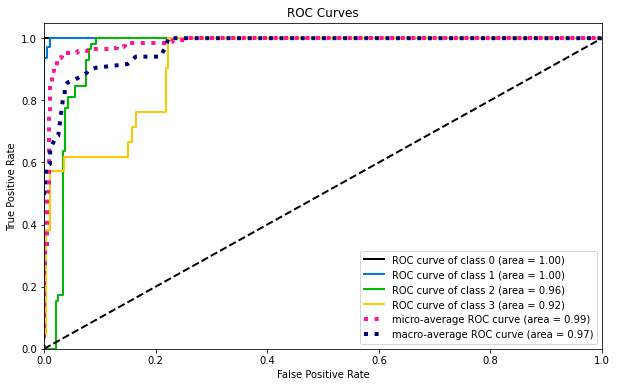



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   8  13]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  0.6190476190476191


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  0.9662447257383966
Specificity for class 4:  1.0


Precision: 0.97
Recall: 0.90
F1 Score: 0.93




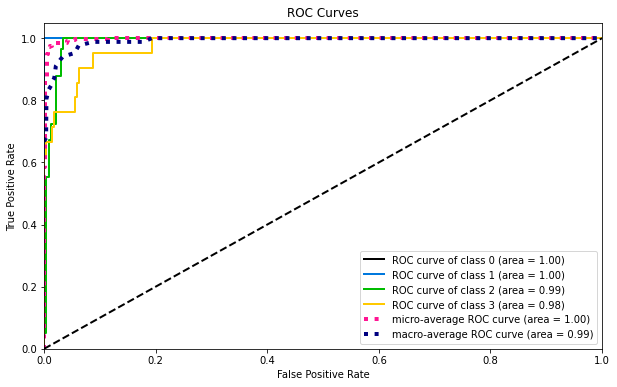

In [ ]:
SensitivityClass1 = []
SensitivityClass2 = []
SensitivityClass3 = []
SensitivityClass4 = []

SpecificityClass1 = []
SpecificityClass2 = []
SpecificityClass3 = []
SpecificityClass4 = []


for train_index, test_index in kfold.split(x,y):
  MLPclassifier.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = MLPclassifier.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = MLPclassifier.predict(X_train)
  y_prob = MLPclassifier.predict_proba(X_test)
  
  cm = confusion_matrix(y_test,y_pred)
  print("Confusion Matrix: ")
  print(cm)
  print("\n")
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3])
  print('Sensitivity for class 1: ', sensitivity )
  SensitivityClass1.append(sensitivity)

  sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3])
  print('Sensitivity for class 2: ', sensitivity )
  SensitivityClass2.append(sensitivity)

  sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3])
  print('Sensitivity for class 3: ', sensitivity )
  SensitivityClass3.append(sensitivity)

  sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3])
  print('Sensitivity for class 4: ', sensitivity )
  SensitivityClass4.append(sensitivity)
  #----------------------------------------------------------------------
  print("\n")
  specificity = (cm[1,1]+cm[2,2]+cm[3,3])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[1,1]+cm[2,2]+cm[3,3])
  print('Specificity for class 1: ', specificity)
  SpecificityClass1.append(specificity)

  specificity = (cm[0,0]+cm[2,2]+cm[3,3])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[0,0]+cm[2,2]+cm[3,3])
  print('Specificity for class 2: ', specificity)
  SpecificityClass2.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[3,3])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[0,0]+cm[1,1]+cm[3,3])
  print('Specificity for class 3: ', specificity)
  SpecificityClass3.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[0,0]+cm[1,1]+cm[2,2])
  print('Specificity for class 4: ', specificity)
  SpecificityClass4.append(specificity)
  #-----------------------------------------------------------------------------------
  print("\n")
  print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
  print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='macro')))
  print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred,average='macro')))
  print("\n")
  #----------------------------------------------------------------------
  skplt.metrics.plot_roc(y_test, y_prob,figsize=(10,6),title_fontsize=12,text_fontsize=10)
  plt.show()
  print("\n")

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
MLP_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("MLP model accuracy(in %) for Training:",MLP_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
MLP_Test = metrics.accuracy_score(y_test, y_pred)*100
print("MLP model accuracy(in %) for Testing:", MLP_Test)

MLP model accuracy(in %) for Training: 99.12790697674419
MLP model accuracy(in %) for Testing: 97.28813559322033


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for MLP:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for MLP:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For MLP:",result2)

Confusion Matrix for MLP:
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   8  13]]
Classification Report for MLP:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       108
           2       0.88      1.00      0.94        58
           3       1.00      0.62      0.76        21

    accuracy                           0.97       295
   macro avg       0.97      0.90      0.93       295
weighted avg       0.98      0.97      0.97       295

Overall Accuracy For MLP: 0.9728813559322034


In [ ]:
#performance measure
MLP_ACC = accuracy_score(y_test,y_pred)
print("Overall Accuracy For MLP:",MLP_ACC)
MLP_ROC_AUC = roc_auc_score(y_test, y_prob, multi_class='ovo', average='weighted')
print("ROC_AUC Score:",MLP_ROC_AUC)
MLP_Precision = precision_score(y_test, y_pred,average='macro')
print('Precision:',MLP_Precision)
MLP_Recall = recall_score(y_test, y_pred,average='macro')
print('Recall:',MLP_Recall)
MLP_F1 = f1_score(y_test, y_pred,average='macro')
print('F1 Score:',MLP_F1)

Overall Accuracy For MLP: 0.9728813559322034
ROC_AUC Score: 0.9896341702254423
Precision: 0.9696969696969697
Recall: 0.9047619047619048
F1 Score: 0.9250474383301708


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
MLP_TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
MLP_TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,MLP_TPR)
print('Specificity: ' ,MLP_TNR)

Sensitivity: 90.47619047619048
Specificity:  99.15611814345992


5.Decision Tree

In [ ]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=5)

Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0


Precision: 1.00
Recall: 1.00
F1 Score: 1.00




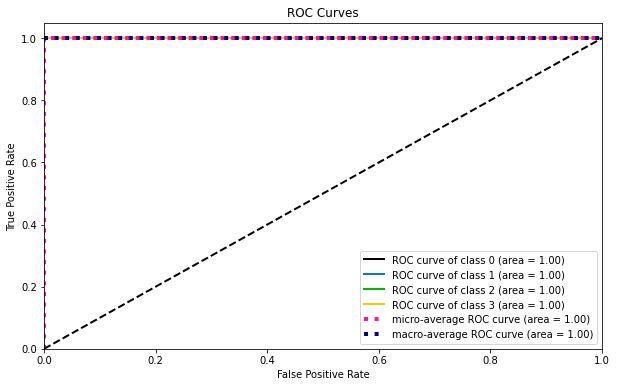



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0


Precision: 1.00
Recall: 1.00
F1 Score: 1.00




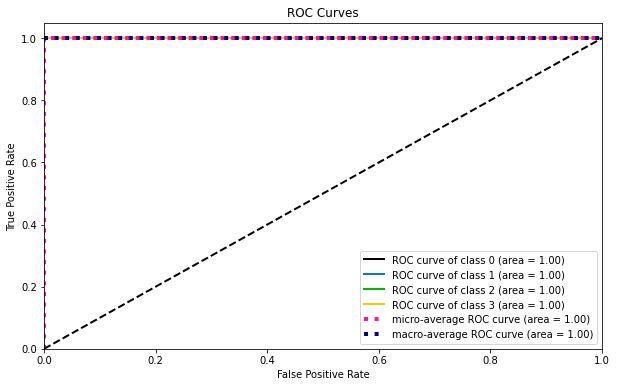



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0


Precision: 1.00
Recall: 1.00
F1 Score: 1.00




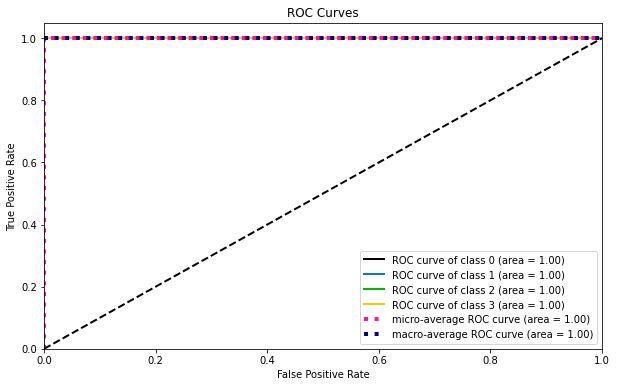



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0


Precision: 1.00
Recall: 1.00
F1 Score: 1.00




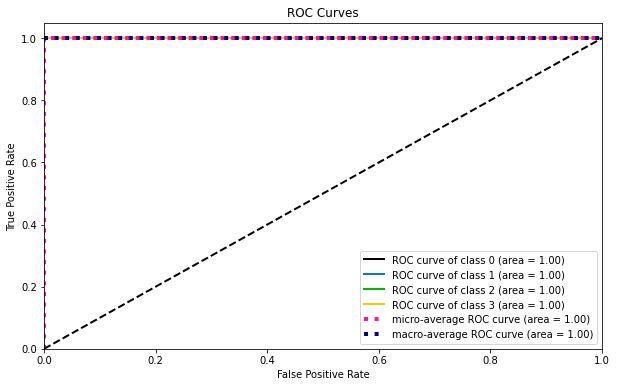



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0


Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0


Precision: 1.00
Recall: 1.00
F1 Score: 1.00




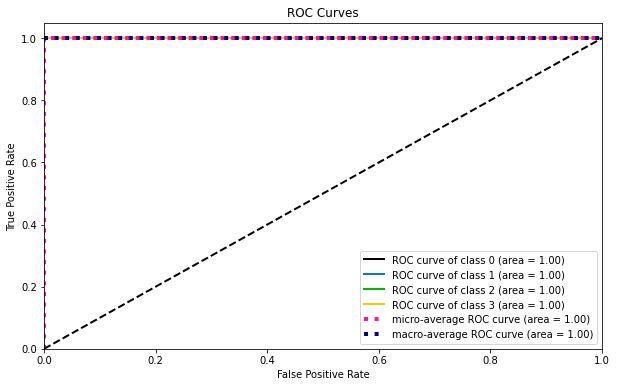

In [ ]:
SensitivityClass1 = []
SensitivityClass2 = []
SensitivityClass3 = []
SensitivityClass4 = []

SpecificityClass1 = []
SpecificityClass2 = []
SpecificityClass3 = []
SpecificityClass4 = []


for train_index, test_index in kfold.split(x,y):
  DTclassifier.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = DTclassifier.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = DTclassifier.predict(X_train)
  y_prob = DTclassifier.predict_proba(X_test)
  
  cm = confusion_matrix(y_test,y_pred)
  print("Confusion Matrix: ")
  print(cm)
  print("\n")
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3])
  print('Sensitivity for class 1: ', sensitivity )
  SensitivityClass1.append(sensitivity)

  sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3])
  print('Sensitivity for class 2: ', sensitivity )
  SensitivityClass2.append(sensitivity)

  sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3])
  print('Sensitivity for class 3: ', sensitivity )
  SensitivityClass3.append(sensitivity)

  sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3])
  print('Sensitivity for class 4: ', sensitivity )
  SensitivityClass4.append(sensitivity)
  #----------------------------------------------------------------------
  print("\n")
  specificity = (cm[1,1]+cm[2,2]+cm[3,3])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[1,1]+cm[2,2]+cm[3,3])
  print('Specificity for class 1: ', specificity)
  SpecificityClass1.append(specificity)

  specificity = (cm[0,0]+cm[2,2]+cm[3,3])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[0,0]+cm[2,2]+cm[3,3])
  print('Specificity for class 2: ', specificity)
  SpecificityClass2.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[3,3])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[0,0]+cm[1,1]+cm[3,3])
  print('Specificity for class 3: ', specificity)
  SpecificityClass3.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[0,0]+cm[1,1]+cm[2,2])
  print('Specificity for class 4: ', specificity)
  SpecificityClass4.append(specificity)
  #-----------------------------------------------------------------------------------
  print("\n")
  print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
  print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='macro')))
  print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred,average='macro')))
  print("\n")
  #----------------------------------------------------------------------
  skplt.metrics.plot_roc(y_test, y_prob,figsize=(10,6),title_fontsize=12,text_fontsize=10)
  plt.show()
  print("\n")

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
DT_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("Decision Tree model accuracy(in %) for Training:",DT_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
DT_Test = metrics.accuracy_score(y_test, y_pred)*100
print("Decision Tree model accuracy(in %) for Testing:", DT_Test)

Decision Tree model accuracy(in %) for Training: 100.0
Decision Tree model accuracy(in %) for Testing: 100.0


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for DT:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for DT:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For DT:",result2)

Confusion Matrix for DT:
[[108   0   0   0]
 [  0 108   0   0]
 [  0   0  58   0]
 [  0   0   0  21]]
Classification Report for DT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00        58
           3       1.00      1.00      1.00        21

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295

Overall Accuracy For DT: 1.0


In [ ]:
#performance measure
DT_ACC = accuracy_score(y_test,y_pred)
print("Overall Accuracy For DT:",DT_ACC)
DT_ROC_AUC = roc_auc_score(y_test, y_prob, multi_class='ovo', average='weighted')
print("ROC_AUC Score:",MLP_ROC_AUC)
DT_Precision = precision_score(y_test, y_pred,average='macro')
print('Precision:',DT_Precision)
DT_Recall = recall_score(y_test, y_pred,average='macro')
print('Recall:',DT_Recall)
DT_F1 = f1_score(y_test, y_pred,average='macro')
print('F1 Score:',DT_F1)

Overall Accuracy For DT: 1.0
ROC_AUC Score: 0.9896341702254423
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
DT_TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
DT_TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,DT_TPR)
print('Specificity: ' ,DT_TNR)

Sensitivity: 100.0
Specificity:  100.0


In [ ]:
Data.columns

Index(['state', 'MaskUsage', 'SocialDistancing', 'mobilityLevels',
       'PopulationDensity', 'casesPC_Levels', 'CurrentIncidencePhase', 'month',
       'week', 'FutureIncidencePhase'],
      dtype='object')

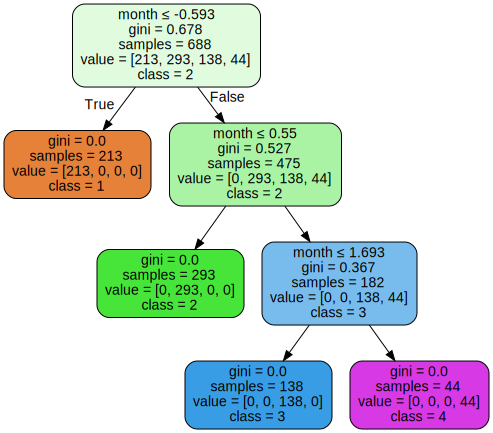

In [ ]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(DTclassifier, out_file=None,
                               feature_names=['month', 'MaskUsage', 'SocialDistancing', 'mobilityLevels',
       'PopulationDensity', 'casesPC_Levels', 'CurrentIncidencePhase', 'state',
       'week'],
                               class_names=['1','2','3','4'],filled=True,
                                rounded=True,  
                              special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("Gini")
graph

6.Random Forest

In [ ]:
RFclassifier = RandomForestClassifier(max_depth = 3)

Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   4  54   0]
 [  0   0  10  11]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.9310344827586207
Sensitivity for class 4:  0.5238095238095238


Specificity for class 1:  1.0
Specificity for class 2:  0.9774011299435028
Specificity for class 3:  0.9578059071729957
Specificity for class 4:  1.0


Precision: 0.95
Recall: 0.86
F1 Score: 0.89




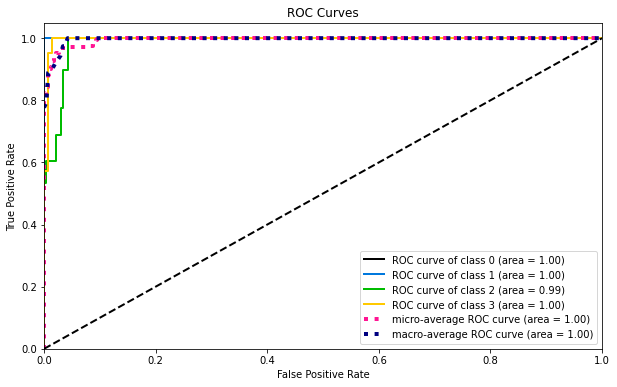



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   1  57   0]
 [  0   0   9  12]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.9827586206896551
Sensitivity for class 4:  0.5714285714285714


Specificity for class 1:  1.0
Specificity for class 2:  0.9943820224719101
Specificity for class 3:  0.9620253164556962
Specificity for class 4:  1.0


Precision: 0.96
Recall: 0.89
F1 Score: 0.91




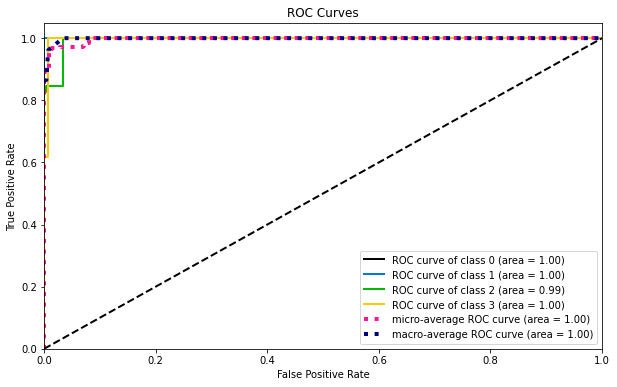



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   4  54   0]
 [  0   0   9  12]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.9310344827586207
Sensitivity for class 4:  0.5714285714285714


Specificity for class 1:  1.0
Specificity for class 2:  0.9775280898876404
Specificity for class 3:  0.9620253164556962
Specificity for class 4:  1.0


Precision: 0.96
Recall: 0.88
F1 Score: 0.90




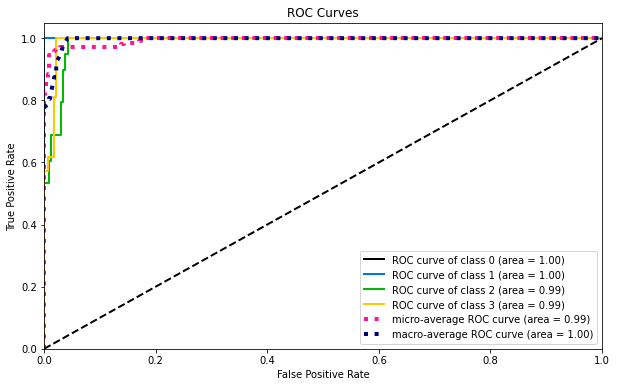



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   3  55   0]
 [  0   0  10  11]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.9482758620689655
Sensitivity for class 4:  0.5238095238095238


Specificity for class 1:  1.0
Specificity for class 2:  0.9830508474576272
Specificity for class 3:  0.9578059071729957
Specificity for class 4:  1.0


Precision: 0.95
Recall: 0.87
F1 Score: 0.89




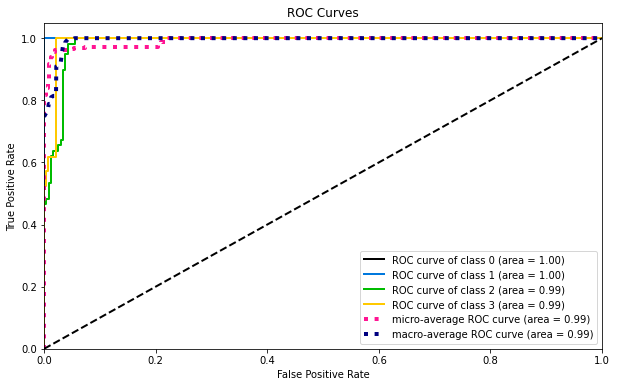



Confusion Matrix: 
[[108   0   0   0]
 [  0 108   0   0]
 [  0   4  54   0]
 [  0   0  10  11]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.9310344827586207
Sensitivity for class 4:  0.5238095238095238


Specificity for class 1:  1.0
Specificity for class 2:  0.9774011299435028
Specificity for class 3:  0.9578059071729957
Specificity for class 4:  1.0


Precision: 0.95
Recall: 0.86
F1 Score: 0.89




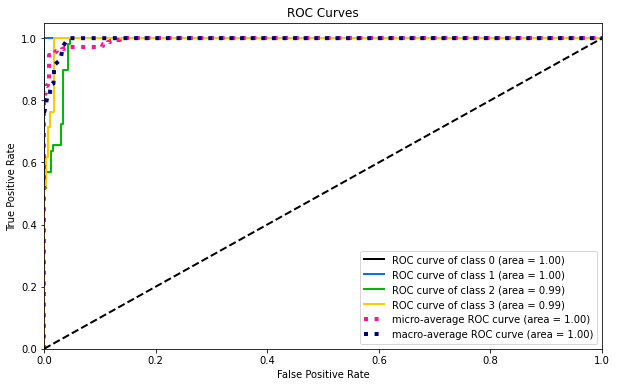

In [ ]:
SensitivityClass1 = []
SensitivityClass2 = []
SensitivityClass3 = []
SensitivityClass4 = []

SpecificityClass1 = []
SpecificityClass2 = []
SpecificityClass3 = []
SpecificityClass4 = []


for train_index, test_index in kfold.split(x,y):
  RFclassifier.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = RFclassifier.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = RFclassifier.predict(X_train)
  y_prob = RFclassifier.predict_proba(X_test)
  
  cm = confusion_matrix(y_test,y_pred)
  print("Confusion Matrix: ")
  print(cm)
  print("\n")
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3])
  print('Sensitivity for class 1: ', sensitivity )
  SensitivityClass1.append(sensitivity)

  sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3])
  print('Sensitivity for class 2: ', sensitivity )
  SensitivityClass2.append(sensitivity)

  sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3])
  print('Sensitivity for class 3: ', sensitivity )
  SensitivityClass3.append(sensitivity)

  sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3])
  print('Sensitivity for class 4: ', sensitivity )
  SensitivityClass4.append(sensitivity)
  #----------------------------------------------------------------------
  print("\n")
  specificity = (cm[1,1]+cm[2,2]+cm[3,3])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[1,1]+cm[2,2]+cm[3,3])
  print('Specificity for class 1: ', specificity)
  SpecificityClass1.append(specificity)

  specificity = (cm[0,0]+cm[2,2]+cm[3,3])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[0,0]+cm[2,2]+cm[3,3])
  print('Specificity for class 2: ', specificity)
  SpecificityClass2.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[3,3])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[0,0]+cm[1,1]+cm[3,3])
  print('Specificity for class 3: ', specificity)
  SpecificityClass3.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[0,0]+cm[1,1]+cm[2,2])
  print('Specificity for class 4: ', specificity)
  SpecificityClass4.append(specificity)
  #-----------------------------------------------------------------------------------
  print("\n")
  print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
  print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='macro')))
  print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred,average='macro')))
  print("\n")
  #----------------------------------------------------------------------
  skplt.metrics.plot_roc(y_test, y_prob,figsize=(10,6),title_fontsize=12,text_fontsize=10)
  plt.show()
  print("\n")

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
RF_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("Random Forest model accuracy(in %) for Training:",RF_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
RF_Test = metrics.accuracy_score(y_test, y_pred)*100
print("Random Forest model accuracy(in %) for Testing:", RF_Test)

Random Forest model accuracy(in %) for Training: 97.52906976744185
Random Forest model accuracy(in %) for Testing: 95.25423728813558


In [ ]:
#performance measure
RF_ACC = accuracy_score(y_test,y_pred)
print("Overall Accuracy For SVC:",RF_ACC)
RF_ROC_AUC = roc_auc_score(y_test, y_prob, multi_class='ovo', average='weighted')
print("ROC_AUC Score:",RF_ROC_AUC)
RF_Precision = precision_score(y_test, y_pred,average='macro')
print('Precision:',RF_Precision)
RF_Recall = recall_score(y_test, y_pred,average='macro')
print('Recall:',RF_Recall)
RF_F1 = f1_score(y_test, y_pred,average='macro')
print('F1 Score:',RF_F1)

Overall Accuracy For SVC: 0.9525423728813559
ROC_AUC Score: 0.9918866355988897
Precision: 0.9520089285714286
Recall: 0.8637110016420361
F1 Score: 0.8886410208643816


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for RF:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for RF:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Overall Accuracy For RF:",result2)

Confusion Matrix for RF:
[[108   0   0   0]
 [  0 108   0   0]
 [  0   4  54   0]
 [  0   0  10  11]]
Classification Report for RF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.96      1.00      0.98       108
           2       0.84      0.93      0.89        58
           3       1.00      0.52      0.69        21

    accuracy                           0.95       295
   macro avg       0.95      0.86      0.89       295
weighted avg       0.96      0.95      0.95       295

Overall Accuracy For RF: 0.9525423728813559


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
RF_TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
RF_TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,RF_TPR)
print('Specificity: ' ,RF_TNR)

Sensitivity: 86.37110016420361
Specificity:  98.41038832103612


In [ ]:
DataTable = {'Support Vector Machine':[SVC_Train,SVC_Test,SVC_ACC,SVC_Precision,SVC_Recall,SVC_F1,SVC_TPR,SVC_TPR,SVC_ROC_AUC],
             'KNN':[KNN_Train,KNN_Test,KNN_ACC,KNN_Precision,KNN_Recall,KNN_F1,KNN_TPR,KNN_TPR,KNN_ROC_AUC],
             'Navie Bayes':[NB_Train,NB_Test,NB_ACC,NB_Precision,NB_Recall,NB_F1,NB_TPR,NB_TPR,NB_ROC_AUC],
             'MLP':[MLP_Train,MLP_Test,MLP_ACC,MLP_Precision,MLP_Recall,MLP_F1,MLP_TPR,MLP_TPR,MLP_ROC_AUC],
             'Decision Tree':[DT_Train,DT_Test,DT_ACC,DT_Precision,DT_Recall,DT_F1,DT_TPR,DT_TPR,DT_ROC_AUC],
             'Random Forest':[RF_Train,RF_Test,RF_ACC,RF_Precision,RF_Recall,RF_F1,RF_TPR,RF_TPR,RF_ROC_AUC]}
# Creates pandas DataFrame.  
pd.DataFrame(DataTable, index =['Training Accuracy','Testing Accuracy','Accuracy', 'Percision', 'Recall','F1 score', 'Sensitivity','Specificity','ROC'])  
 

,Support Vector Machine,KNN,Navie Bayes,MLP,Decision Tree,Random Forest
Training Accuracy,100.000000,96.220930,100.0,99.127907,100.0,97.529070
Testing Accuracy,99.661017,92.542373,100.0,97.288136,100.0,95.254237
Accuracy,0.952542,0.925424,1.0,0.972881,1.0,0.952542
Percision,0.952009,0.938361,1.0,0.969697,1.0,0.952009
Recall,0.863711,0.885160,1.0,0.904762,1.0,0.863711
F1 score,0.888641,0.907280,1.0,0.925047,1.0,0.888641
Sensitivity,98.809524,88.516010,100.0,90.476190,100.0,86.371100
Specificity,98.809524,88.516010,100.0,90.476190,100.0,86.371100
ROC,0.991887,0.974930,1.0,0.989634,1.0,0.991887


Association Rules

In [ ]:
df1 = pd.read_csv('TransactionalData.csv')

In [ ]:
df1

,state,MaskUsage,SocialDistancing,mobilityLevels,PopulationDensity,casesPC_Levels,CurrentIncidencePhase,month,week,FutureIncidencePhase
0,California,N,Phase 0,VL,1,L,Phase 1,6,22,Phase 2
1,California,N,Phase 0,VL,1,L,Phase 1,6,23,Phase 2
2,California,N,Phase 0,VL,1,L,Phase 2,6,24,Phase 2
3,California,M,Phase 0,VL,1,L,Phase 2,6,25,Phase 2
4,California,M,Phase 0,VL,1,M,Phase 2,6,26,Phase 2
...,...,...,...,...,...,...,...,...,...,...
1045,Wyoming,N,Phase 0,VH,1,L,Phase 1,9,38,Phase 1
1046,Wyoming,N,Phase 0,VH,1,M,Phase 1,9,39,Phase 1
1047,Wyoming,N,Phase 0,VH,1,H,Phase 1,10,40,Phase 1
1048,Wyoming,N,Phase 0,VH,1,VH,Phase 1,10,41,Phase 1


In [ ]:
df1.drop(columns=['state','month','week'], inplace=True)
df1['MaskUsage'] = 'MU: '+df1['MaskUsage']
df1['SocialDistancing'] = 'SD: '+df1['SocialDistancing']
df1['mobilityLevels'] = 'ML: '+df1['mobilityLevels']
df1['PopulationDensity'] = 'PD: '+df1['PopulationDensity'].astype(str)
df1['casesPC_Levels'] = 'CPC: '+df1['casesPC_Levels']
df1['CurrentIncidencePhase'] = 'CP: '+df1['CurrentIncidencePhase']
df1['FutureIncidencePhase'] = 'FP: '+df1['FutureIncidencePhase']

In [ ]:
tuples = df1.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(tuples).transform(tuples)
tdf = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(tdf, min_support=0.00001, use_colnames=True)
assoc_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.005)
assoc_rules['antecedents'] = assoc_rules['antecedents'].apply(lambda x:', '.join(list(x))).astype('unicode')
assoc_rules['consequents'] = assoc_rules['consequents'].apply(lambda x:', '.join(list(x))).astype('unicode')
assoc_rules['chi_squared'] = 1050*(assoc_rules['lift']-1)*(assoc_rules['lift']-1)*(assoc_rules['support']*assoc_rules['confidence']/((assoc_rules['confidence']-assoc_rules['support'])*(assoc_rules['lift']-assoc_rules['confidence'])))


In [ ]:
targeted_consequents = ['FP: Phase 2', 'FP: Phase 3', 'FP: Phase 4', 'FP: Phase 5','FP: Phase 1']
assoc_rules_filtered = assoc_rules[assoc_rules['consequents'].isin(targeted_consequents)]

In [ ]:
ndf={}
k = 0
for index,row in assoc_rules_filtered.iterrows():
    nrow = {}
    for ant_item in str(row['antecedents']).split(','):
        strngs = ant_item.split(':')
        nrow[strngs[0].strip()] = strngs[1].strip()
    nrow[row['consequents'].split(':')[0].strip()] = row['consequents'].split(':')[1].strip()
    nrow['support'] = row['support']
    nrow['confidence'] = row['confidence']
    nrow['lift'] = row['lift']
    nrow['chi_squared'] = row['chi_squared']
    ndf[k] = nrow
    k += 1

In [ ]:
ndfDF = pd.DataFrame.from_dict(ndf, 'index')
ndfDF.rename(columns={'PD':'Population Density',
                      'FP':'Future Phase',
                      'CP':'Current Phase','MU':'Mask Mandate','SD':'Social Distancing','CPC':'Cases Per Capita','ML':'Mobility Level'}, inplace=True)
ndfDF = ndfDF[['Mask Mandate','Social Distancing','Mobility Level','Population Density','Cases Per Capita','Current Phase','Future Phase','support','confidence','lift','chi_squared']]
ndfDF.to_csv('Final_Rules.csv', index=False)

In [ ]:
ndfDF

,Mask Mandate,Social Distancing,Mobility Level,Population Density,Cases Per Capita,Current Phase,Future Phase,support,confidence,lift,chi_squared
0,NaN,NaN,NaN,NaN,NaN,Phase 1,Phase 1,0.217143,0.775510,2.536716,424.599374
1,NaN,NaN,NaN,NaN,NaN,Phase 1,Phase 2,0.062857,0.224490,0.554622,55.078431
2,NaN,NaN,NaN,NaN,NaN,Phase 2,Phase 1,0.011429,0.027972,0.091497,263.624004
3,NaN,NaN,NaN,NaN,NaN,Phase 2,Phase 2,0.301905,0.738928,1.825586,336.193050
4,NaN,NaN,NaN,NaN,NaN,Phase 2,Phase 3,0.095238,0.233100,1.133126,3.329426
...,...,...,...,...,...,...,...,...,...,...,...
10847,M,Phase 3,H,2,VL,NaN,Phase 5,0.000952,1.000000,150.000000,149.142040
10848,M,Phase 1,L,3,VL,NaN,Phase 5,0.000952,0.125000,18.750000,17.045982
10849,M,Phase 3,VL,2,VL,NaN,Phase 5,0.000952,1.000000,150.000000,149.142040
10850,M,Phase 4,VL,2,VL,NaN,Phase 5,0.001905,0.250000,37.500000,72.079378
